In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
blood_transfusion.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


In [4]:
blood_transfusion['Class'].describe()

count             748
unique              2
top       not donated
freq              570
Name: Class, dtype: object

In [5]:
blood_transfusion['Class'].value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

dummy_clf = DummyClassifier(strategy='most_frequent')

cv_result =cross_validate(dummy_clf, data, target, cv = 10)
cv_result

{'fit_time': array([0.00109625, 0.00070071, 0.00068021, 0.00067639, 0.00067282,
        0.00067091, 0.00068521, 0.00066233, 0.00066924, 0.00065947]),
 'score_time': array([0.00038576, 0.00029182, 0.00029302, 0.00029349, 0.00028396,
        0.00034714, 0.00028682, 0.00027943, 0.0002799 , 0.00032735]),
 'test_score': array([0.76      , 0.76      , 0.76      , 0.76      , 0.76      ,
        0.76      , 0.76      , 0.76      , 0.77027027, 0.77027027])}

In [8]:
cv_result_bal =cross_validate(dummy_clf, data, target, cv = 10, scoring='balanced_accuracy')
cv_result_bal

{'fit_time': array([0.00105691, 0.00070715, 0.00066996, 0.00067019, 0.00068092,
        0.00066113, 0.00066519, 0.00067735, 0.00068355, 0.0006597 ]),
 'score_time': array([0.00080109, 0.00055337, 0.00054598, 0.00054717, 0.00055289,
        0.00054646, 0.00054741, 0.00054121, 0.00054646, 0.00055027]),
 'test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])}

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
cv_result_mod = cross_validate(model, data, target, cv = 10, return_train_score=True)
cv_result_mod

{'fit_time': array([0.00400519, 0.00356913, 0.00340199, 0.00335169, 0.00335145,
        0.00338721, 0.0033443 , 0.00333023, 0.00331831, 0.00333333]),
 'score_time': array([0.00335836, 0.00316167, 0.0031569 , 0.0031476 , 0.00316381,
        0.00317025, 0.00314617, 0.00311112, 0.0031302 , 0.00313544]),
 'test_score': array([0.37333333, 0.4       , 0.56      , 0.70666667, 0.73333333,
        0.76      , 0.68      , 0.78666667, 0.74324324, 0.78378378]),
 'train_score': array([0.84249629, 0.81575037, 0.80534918, 0.82763744, 0.82020802,
        0.82763744, 0.82169391, 0.8127786 , 0.82195846, 0.81750742])}

In [13]:
cv_result_mod = pd.DataFrame(cv_result_mod)
cv_result_mod

,fit_time,score_time,test_score,train_score
0,0.004005,0.003358,0.373333,0.842496
1,0.003569,0.003162,0.400000,0.815750
2,0.003402,0.003157,0.560000,0.805349
3,0.003352,0.003148,0.706667,0.827637
4,0.003351,0.003164,0.733333,0.820208
5,0.003387,0.003170,0.760000,0.827637
6,0.003344,0.003146,0.680000,0.821694
7,0.003330,0.003111,0.786667,0.812779
8,0.003318,0.003130,0.743243,0.821958
9,0.003333,0.003135,0.783784,0.817507


In [16]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]
param_name = "kneighborsclassifier__n_neighbors"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=param_range,
    cv=5,scoring='balanced_accuracy')

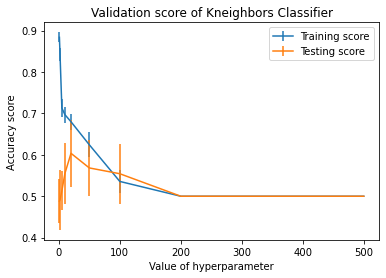

In [22]:
import matplotlib.pyplot as plt


plt.errorbar(param_range, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label='Training score')
plt.errorbar(param_range, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label='Testing score')
plt.legend()

plt.xscale("linear")
plt.xlabel(r"Value of hyperparameter")
plt.ylabel("Accuracy score")
_ = plt.title("Validation score of Kneighbors Classifier")

In [15]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}